<a href="https://colab.research.google.com/github/AsifRifat/Cricket-Outcome-Predictor/blob/main/CricketOutcomePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import necessary libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os
import pandas as pd
import numpy as np
import glob
import pickle
from pandas import DataFrame
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Merge all csv files of ODI matches**

In [ ]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [ ]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "odi.csv", index=False)

# **Import Dataset ODI**

In [2]:
%cd /content/drive/My\ Drive/cricket data

/content/drive/My Drive/cricket data


In [3]:
df1 = pd.read_csv("odi.csv")

In [ ]:
df2 = pd.read_csv("t20.csv")

In [ ]:
df3 = pd.read_csv("odi_matches.csv")

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
df1.tail(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
1036705,1290881,2021/22,2021-11-26,"Wanderers Cricket Ground, Windhoek",2,46.1,Oman,Namibia,Zeeshan Maqsood,Kaleemullah,R Trumpelmann,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1036706,1290881,2021/22,2021-11-26,"Wanderers Cricket Ground, Windhoek",2,46.2,Oman,Namibia,Kaleemullah,Zeeshan Maqsood,R Trumpelmann,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1036707,1290881,2021/22,2021-11-26,"Wanderers Cricket Ground, Windhoek",2,46.3,Oman,Namibia,Zeeshan Maqsood,Kaleemullah,R Trumpelmann,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1036708,1290881,2021/22,2021-11-26,"Wanderers Cricket Ground, Windhoek",2,46.4,Oman,Namibia,Zeeshan Maqsood,Kaleemullah,R Trumpelmann,0,0,NaN,NaN,NaN,NaN,NaN,caught,Zeeshan Maqsood,NaN,NaN
1036709,1290881,2021/22,2021-11-26,"Wanderers Cricket Ground, Windhoek",2,46.5,Oman,Namibia,Bilal Khan,Kaleemullah,R Trumpelmann,0,0,NaN,NaN,NaN,NaN,NaN,caught,Bilal Khan,NaN,NaN


In [ ]:
df2.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,211048,2004/05,2005-02-17,Eden Park,1,0.1,Australia,New Zealand,AC Gilchrist,MJ Clarke,DR Tuffey,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,211048,2004/05,2005-02-17,Eden Park,1,0.2,Australia,New Zealand,AC Gilchrist,MJ Clarke,DR Tuffey,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,211048,2004/05,2005-02-17,Eden Park,1,0.3,Australia,New Zealand,MJ Clarke,AC Gilchrist,DR Tuffey,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,211048,2004/05,2005-02-17,Eden Park,1,0.4,Australia,New Zealand,MJ Clarke,AC Gilchrist,DR Tuffey,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,211048,2004/05,2005-02-17,Eden Park,1,0.5,Australia,New Zealand,AC Gilchrist,MJ Clarke,DR Tuffey,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Pre-processing**

In [ ]:
#Sort a data frame by "start_date", "match_id", "innings", "ball
#df1 = df1.sort_values(by = ["start_date", "match_id", "innings", "ball" ],axis = 0,ascending = [True, True, True, True])

In [ ]:
#Sort a data frame by "start_date", "match_id", "innings", "ball
#df2 = df2.sort_values(by = ["start_date", "match_id", "innings", "ball" ],axis = 0,ascending = [True, True, True, True])

In [5]:
#Keep only first innings of each ODI match
df1 = df1[df1.innings == 1]

In [6]:
df1['batting_team'].unique()

array(['Pakistan', 'Australia', 'Zimbabwe', 'India', 'South Africa',
       'West Indies', 'Sri Lanka', 'Bangladesh', 'England', 'New Zealand',
       'United States of America', 'Kenya', 'Africa XI', 'Bermuda',
       'Canada', 'Netherlands', 'Scotland', 'Ireland', 'Asia XI',
       'Afghanistan', 'Hong Kong', 'United Arab Emirates',
       'Papua New Guinea', 'Nepal', 'Namibia', 'Oman'], dtype=object)

In [7]:
#Keep only consistent 14 teams
top14_teams = ['Australia', 'England', 'South Africa', 'West Indies', 'Sri Lanka','New Zealand',
             'Pakistan', 'India', 'Bangladesh', 'Zimbabwe', 'Ireland', 'Afghanistan','Scotland','Netherlands']

df1 = df1[(df1['batting_team'].isin(top14_teams)) & (df1['bowling_team'].isin(top14_teams))]

In [8]:
from datetime import datetime
df1['start_date'] = df1['start_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
df1['venue'].unique()

array(['Eden Park', 'Melbourne Cricket Ground', 'Sydney Cricket Ground',
       'Bellerive Oval', 'Brisbane Cricket Ground', 'Newlands',
       'Kingsmead', 'SuperSport Park', 'W.A.C.A. Ground',
       'Rangiri Dambulla International Stadium', 'Carisbrook',
       'R.Premadasa Stadium', 'Harare Sports Club',
       'Rawalpindi Cricket Stadium', 'Arbab Niaz Stadium',
       'Gaddafi Stadium', 'Queens Sports Club', "Queen's Park Oval",
       'Daren Sammy National Cricket Stadium', 'Arnos Vale Ground',
       'National Cricket Stadium', 'Trent Bridge', 'Riverside Ground',
       'Headingley', "Lord's", 'Sinhalese Sports Club',
       'VRA Cricket Ground', 'Kennington Oval', 'Edgbaston',
       'The Rose Bowl', 'Multan Cricket Stadium', 'National Stadium',
       'MA Aziz Stadium', 'Docklands Stadium',
       'Bangabandhu National Stadium',
       'Brisbane Cricket Ground, Woolloongabba', 'Adelaide Oval',
       'The Wanderers Stadium', 'Mangaung Oval', "St George's Park",
       'Buffalo

# **Generate new columns**

In [9]:
sum_runs_off_bat_extras = df1["runs_off_bat"] + df1["extras"]

df1["runs"] = sum_runs_off_bat_extras

In [ ]:
#gr1 = df1.groupby(df1.ball.eq(0.1).cumsum())
#df1["current_run"] = gr1.runs.cumsum()
#df1["total_runs"] = gr1.current_run.transform("max")

In [ ]:
#gr1 = df1.groupby(df1.ball.eq(0.1).cumsum())
#df1["current_run"] = gr1.runs.cumsum()

In [10]:
df1['current_run'] = df1.groupby('match_id')['runs'].cumsum()

In [11]:
gr2 = df1.groupby('match_id')
df1["total_runs"] = gr2.current_run.transform("max")

In [12]:
df1['striker_run'] = df1.groupby(['match_id', 'striker'])['runs_off_bat'].cumsum()

In [13]:
m1 = df1['striker'].ne(df1['striker'].groupby(df1['match_id']).shift())
m2 = df1['striker'].eq(df1['non_striker'].shift())
m3 = df1['non_striker'].eq(df1['striker'].shift())
m = m1 & (m2 | m3)

df1['nonstriker_run'] = np.where(m, df1['striker_run'].shift(), np.nan)


m21 = df1['non_striker'] != df1['non_striker'].shift()
m22 = df1['non_striker'] != df1['striker'].shift()
df1['nonstriker_run'] = np.where(m21 & m22, 0, df1['nonstriker_run'])

m11 = df1['match_id'] != df1['match_id'].shift()
df1['nonstriker_run'] = np.where(m11, 0, df1['nonstriker_run'])

df1['nonstriker_run'] = df1['nonstriker_run'].ffill(downcast='infer')

In [14]:
df1['wicket']=(df1['wicket_type'].ne('retired hurt') & df1['wicket_type'].notna()).groupby(df1['match_id']).cumsum()

In [15]:
df1['runs_last10'] = df1.groupby('match_id',sort=False)['runs'].rolling(min_periods=1, window=60).sum().astype("int64").values

In [16]:
df1['wicket_last10'] = ((df1['wicket_type'].ne('retired hurt') & df1['wicket_type'].notna())
                      .groupby(df1['match_id'],sort=False)
                      .rolling(min_periods=1, window=60).sum().astype("int64")
                      .values)

In [17]:
#df1 = df1.set_index('venue').assign(venue_avg=df1[~df1.set_index(['venue', 'total_runs'])
#    .index.duplicated()].groupby('venue')['total_runs'].mean().astype(int)).reset_index()
df1['venue_avg'] = df1['venue'].map(df1.drop_duplicates(['match_id', 'venue']).groupby('venue')['total_runs'].mean().astype(int))

In [18]:
df1['bat_team_avg'] = df1['batting_team'].map(df1.drop_duplicates(['match_id', 'batting_team']).groupby('batting_team')['total_runs'].mean().astype(int))

In [19]:
df1['bat_team_str'] = df1['match_id'].map(df1.groupby('match_id').apply(lambda x: x['total_runs']
                                                                        .iloc[0] * 100 / x[['wides', 'noballs']].isna().sum(axis=1).eq(2).sum()))

In [20]:
df1['bat_team_str_avg'] = df1['batting_team'].map(df1.drop_duplicates(['match_id', 'batting_team']).groupby('batting_team')['bat_team_str'].mean().astype(int))

In [21]:
df1['bowlteam_avg'] = df1['match_id'].map(df1.groupby('match_id').apply(lambda x: x['total_runs'].iloc[0] / x['wicket'].replace(0, np.nan).max()))

In [22]:
df1['bowl_team_avg'] = df1['bowling_team'].map(df1.drop_duplicates(['match_id', 'bowling_team']).groupby('bowling_team')['bowlteam_avg'].mean().astype(int))

In [23]:
df1['bowlteam_str'] = df1['match_id'].map(df1.groupby('match_id').apply(lambda x: x[['wides', 'noballs']].isna().sum(axis=1).eq(2).sum() / 
                                                                        x['wicket'].replace(0, np.nan).max()))

In [24]:
df1['bowl_team_str'] = df1['bowling_team'].map(df1.drop_duplicates(['match_id', 'bowling_team']).groupby('bowling_team')['bowlteam_str'].mean().astype(int))

In [25]:
df1['bowlteam_eco'] = df1['match_id'].map(df1.groupby('match_id').apply(lambda x: x['total_runs'].iloc[0] /
                                                                         (x[['wides', 'noballs']].isna().sum(axis=1).eq(2).sum()/6)))

In [26]:
df1['bowl_team_eco'] = df1['bowling_team'].map(df1.drop_duplicates(['match_id', 'bowling_team']).groupby('bowling_team')['bowlteam_eco'].mean())

In [27]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df1[['batting_team', 'bowling_team']])
df1[['batL', 'ballL']] = enc.transform(df1[['batting_team', 'bowling_team']])

In [40]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#ball_labels = le.fit_transform(df1['bowling_team'])
#ball_mappings = {index: label for index, label in 
#                  enumerate(le.classes_)}
#ball_mappings

{0: 'Afghanistan',
 1: 'Australia',
 2: 'Bangladesh',
 3: 'England',
 4: 'India',
 5: 'Ireland',
 6: 'Netherlands',
 7: 'New Zealand',
 8: 'Pakistan',
 9: 'Scotland',
 10: 'South Africa',
 11: 'Sri Lanka',
 12: 'West Indies',
 13: 'Zimbabwe'}

In [28]:
#df1['BatLabel'] = bat_labels
#df1['BallLabel'] = ball_labels
col = ['match_id','season','start_date','venue','innings','ball','batting_team','batL','bowling_team','ballL','runs_off_bat','runs','current_run','wicket',
           'striker','non_striker','bowler','striker_run','nonstriker_run','wicket_type','player_dismissed','extras','wides','noballs','byes','legbyes','penalty',
           'runs_last10','wicket_last10','venue_avg','bat_team_avg','bat_team_str_avg','bowl_team_avg','bowl_team_str','bowl_team_eco','total_runs']
df1 = df1.reindex(columns=col)

,match_id,season,start_date,venue,innings,ball,batting_team,batL,bowling_team,ballL,runs_off_bat,runs,current_run,wicket,striker,non_striker,bowler,striker_run,nonstriker_run,wicket_type,player_dismissed,extras,wides,noballs,byes,legbyes,penalty,runs_last10,wicket_last10,venue_avg,bat_team_avg,bat_team_str_avg,bowl_team_avg,bowl_team_str,bowl_team_eco,total_runs
784797,1040495,2016/17,2017-03-19,Greater Noida Sports Complex Ground,1,20.5,Afghanistan,0.0,Ireland,5.0,0,0,79,5,Samiullah Shenwari,Gulbadin Naib,GH Dockrell,14,6,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,33,1,268,223,78,34,38,5.174530,264
224539,298806,2007/08,2008-01-25,Newlands,1,47.1,South Africa,10.0,West Indies,12.0,1,1,240,5,JP Duminy,SM Pollock,JE Taylor,57,12,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,60,2,260,265,93,38,41,5.353775,255
288027,352666,2008/09,2009-03-22,Providence Stadium,1,25.1,West Indies,12.0,England,3.0,0,0,110,2,RR Sarwan,S Chanderpaul,GJ Batty,52,36,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,51,0,233,226,82,33,37,5.251737,264
684895,743951,2015,2015-06-20,Riverside Ground,1,26.1,New Zealand,7.0,England,3.0,1,1,127,2,LRPL Taylor,MJ Guptill,AU Rashid,19,51,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,47,1,253,257,90,33,37,5.251737,283
894888,1153314,2018/19,2018-12-09,"Shere Bangla National Stadium, Mirpur",1,48.4,West Indies,12.0,Bangladesh,2.0,2,2,188,7,KAJ Roach,KMA Paul,Rubel Hossain,2,32,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,63,2,230,226,82,38,41,5.241520,195


In [56]:
df1.sample(5)

,match_id,season,start_date,venue,innings,ball,batting_team,batL,bowling_team,ballL,runs_off_bat,runs,current_run,wicket,striker,non_striker,bowler,striker_run,nonstriker_run,wicket_type,player_dismissed,extras,wides,noballs,byes,legbyes,penalty,runs_last10,wicket_last10,venue_avg,bat_team_avg,bat_team_str_avg,bowl_team_avg,bowl_team_str,bowl_team_eco,total_runs
322399,422626,2009/10,2009-10-27,Shere Bangla National Stadium,1,19.3,Bangladesh,2.0,Zimbabwe,13.0,0,0,62,6,Mahmudullah,Mushfiqur Rahim,CJ Chibhabha,4,1,caught,Mahmudullah,0,NaN,NaN,NaN,NaN,NaN,42,4,230,228,80,45,46,5.509135,186
587729,690357,2013/14,2014-02-20,Shere Bangla National Stadium,1,18.2,Sri Lanka,11.0,Bangladesh,2.0,0,0,73,3,SMA Priyanjan,KC Sangakkara,Sohag Gazi,3,41,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,31,1,230,242,86,38,41,5.241520,289
203117,297794,2007/08,2007-10-02,Nehru Stadium,1,46.3,Australia,1.0,India,4.0,4,4,267,4,BJ Haddin,A Symonds,S Sreesanth,60,87,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,79,0,258,267,91,37,41,5.234357,306
285115,351693,2008/09,2009-02-13,"Brisbane Cricket Ground, Woolloongabba",1,5.4,Australia,1.0,New Zealand,7.0,1,1,30,2,BJ Haddin,DJ Hussey,IE O'Brien,15,6,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,30,2,243,267,91,34,38,5.142972,168
213042,299010,2007/08,2007-10-29,Gaddafi Stadium,1,18.1,South Africa,10.0,Pakistan,8.0,0,0,86,1,JH Kallis,HH Gibbs,Iftikhar Anjum,24,54,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,42,0,295,265,93,37,41,5.167826,233


# **Data cleaning**

In [ ]:
df1.isnull().sum()

match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     503596
noballs                   513250
byes                      514454
legbyes                   509900
penalty                   515205
wicket_type               501268
player_dismissed          501268
other_wicket_type         515210
other_player_dismissed    515210
runs                           0
current_run                    0
total_runs                     0
striker_run                    0
nonstriker_run                 0
wicket                         0
runs_last10                    0
wicket_last10                  0
dtype: int

In [ ]:
#Drop unnecessary coulumns that don't have noticible impact on total runs
df1 = df1[['match_id','season','start_date','venue','innings','ball','batting_team','bowling_team','runs_off_bat','runs','current_run','wicket',
           'striker','non_striker','bowler','striker_run','nonstriker_run','wicket_type','player_dismissed','extras','wides','noballs','byes','legbyes','penalty',
           'runs_last10','wicket_last10','venue_avg','bat_team_avg','bat_team_str_avg','bowl_team_avg','bowl_team_str','bowl_team_eco','total_runs']]

In [29]:
#Delete first 10 overs of each match
df1 = df1[df1.ball >= 10.0]

In [29]:
#Delete low scoring and rain interrupted matches 
df1 = df1[df1.total_runs >= 50]

# **Exploratory data analysis(EDA)**

In [30]:
df1.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,batL,bowling_team,ballL,runs_off_bat,runs,current_run,wicket,striker,non_striker,bowler,striker_run,nonstriker_run,wicket_type,player_dismissed,extras,wides,noballs,byes,legbyes,penalty,runs_last10,wicket_last10,venue_avg,bat_team_avg,bat_team_str_avg,bowl_team_avg,bowl_team_str,bowl_team_eco,total_runs
0,64857,2003/04,2004-01-03,Eden Park,1,0.1,Pakistan,8.0,New Zealand,7.0,4,4,4,0,Yasir Hameed,Imran Farhat,DR Tuffey,4,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,4,0,239,252,87,34,38,5.142972,229
1,64857,2003/04,2004-01-03,Eden Park,1,0.2,Pakistan,8.0,New Zealand,7.0,0,0,4,0,Yasir Hameed,Imran Farhat,DR Tuffey,4,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,4,0,239,252,87,34,38,5.142972,229
2,64857,2003/04,2004-01-03,Eden Park,1,0.3,Pakistan,8.0,New Zealand,7.0,0,0,4,0,Yasir Hameed,Imran Farhat,DR Tuffey,4,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,4,0,239,252,87,34,38,5.142972,229
3,64857,2003/04,2004-01-03,Eden Park,1,0.4,Pakistan,8.0,New Zealand,7.0,0,0,4,0,Yasir Hameed,Imran Farhat,DR Tuffey,4,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,4,0,239,252,87,34,38,5.142972,229
4,64857,2003/04,2004-01-03,Eden Park,1,0.5,Pakistan,8.0,New Zealand,7.0,0,0,4,0,Yasir Hameed,Imran Farhat,DR Tuffey,4,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,4,0,239,252,87,34,38,5.142972,229


In [ ]:
df3.head(5)

,team1,runs,Inn,overs,rpo,Date,result,team2,Ground
0,Australia,240,1,50.0,4.80,6 Jan 1985,lost,West Indies,Melbourne
1,West Indies,241,2,44.5,5.37,6 Jan 1985,won,Australia,Melbourne
2,Sri Lanka,239,1,49.0,4.87,8 Jan 1985,lost,Australia,Sydney
3,Australia,240,2,46.2,5.17,8 Jan 1985,won,Sri Lanka,Sydney
4,Sri Lanka,197,1,50.0,3.94,10 Jan 1985,lost,West Indies,Hobart


In [55]:
df1.info() #5,7,9,12,13,17,18,27,28,29,30,31,32,34 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514664 entries, 0 to 1036104
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   match_id          514664 non-null  int64         
 1   season            514664 non-null  object        
 2   start_date        514664 non-null  datetime64[ns]
 3   venue             514664 non-null  object        
 4   innings           514664 non-null  int64         
 5   ball              514664 non-null  float64       
 6   batting_team      514664 non-null  object        
 7   batL              514664 non-null  float64       
 8   bowling_team      514664 non-null  object        
 9   ballL             514664 non-null  float64       
 10  runs_off_bat      514664 non-null  int64         
 11  runs              514664 non-null  int64         
 12  current_run       514664 non-null  int64         
 13  wicket            514664 non-null  int64         
 14  str

In [31]:
df1.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,match_id,innings,ball,batL,ballL,runs_off_bat,runs,current_run,wicket,striker_run,nonstriker_run,extras,wides,noballs,byes,legbyes,penalty,runs_last10,wicket_last10,venue_avg,bat_team_avg,bat_team_str_avg,bowl_team_avg,bowl_team_str,bowl_team_eco,total_runs
count,514664,514664,514664,514664,514664,514664,514664,514664,514664,514664,514664,514664,11597,1957,756,5308,5,514664,514664,514664,514664,514664,514664,514664,514664,514664
mean,635767,1,23.8847,6.53728,6.71014,0.806581,0.854109,114.616,2.95572,23.9985,23.6528,0.0475281,1.19057,1.04241,1.89021,1.34891,5,43.7397,1.18593,247.718,246.992,86.6405,35.7925,39.3989,5.22586,254.499
std,356211,0,14.2052,4.17002,4.0471,1.25232,1.25711,77.6591,2.29005,25.3901,25.0074,0.286031,0.765145,0.352815,1.27112,0.862053,0,19.7413,1.12525,27.3841,21.0915,6.47103,3.57315,2.74896,0.115453,62.44
min,64857,1,0.1,0,0,0,0,0,0,0,0,0,1,1,1,1,5,0,0,54,186,66,30,35,4.90689,54
25%,335356,1,11.5,3,3,0,0,51,1,5,5,0,1,1,1,1,5,32,0,230,228,82,33,37,5.14297,217
50%,565812,1,23.5,7,7,0,0,105,3,16,15,0,1,1,1,1,5,44,1,247,257,90,37,40,5.23436,256
75%,1.00765e+06,1,36.1,11,11,1,1,168,4,35,35,0,1,1,3,1,5,55,2,260,265,92,37,41,5.26881,296
max,1.27707e+06,1,49.9,13,13,6,7,481,10,264,264,5,5,5,4,5,5,181,9,418,269,93,45,46,5.50914,481


In [ ]:
showme = df1.drop_duplicates(subset = ["bat_team_str_avg"])
showme

,match_id,season,start_date,venue,venue_avg,bat_team_avg,innings,ball,batting_team,bowling_team,runs_off_bat,runs,current_run,wicket,striker,non_striker,bowler,striker_run,nonstriker_run,wicket_type,player_dismissed,extras,wides,noballs,byes,legbyes,penalty,runs_last10,wicket_last10,total_runs,bat_team_str,bat_team_str_avg
0,64857,2003/04,2004-01-03,Eden Park,239,252,1,0.1,Pakistan,New Zealand,4,4,4,0,Yasir Hameed,Imran Farhat,DR Tuffey,4,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,4,0,229,76,87
611,65643,2003/04,2004-01-09,Melbourne Cricket Ground,260,267,1,0.1,Australia,India,1,1,1,0,AC Gilchrist,ML Hayden,AB Agarkar,1,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1,0,288,98,91
1771,65645,2003/04,2004-01-14,Bellerive Oval,266,202,1,0.1,Zimbabwe,India,0,0,0,0,V Sibanda,SV Carlisle,AB Agarkar,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,208,69,72
2925,65647,2003/04,2004-01-18,Brisbane Cricket Ground,279,269,1,0.1,India,Australia,0,1,1,0,SC Ganguly,SR Tendulkar,JN Gillespie,0,0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,1,0,303,101,93
5416,64864,2003/04,2004-01-30,Kingsmead,252,226,1,0.1,West Indies,South Africa,0,0,0,0,CH Gayle,S Chanderpaul,SM Pollock,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,147,61,81
8441,64871,2003/04,2004-02-22,Rangiri Dambulla International Stadium,227,242,1,0.1,Sri Lanka,Australia,0,0,0,0,MS Atapattu,ST Jayasuriya,JN Gillespie,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,245,81,85
10223,64881,2003/04,2004-03-14,Harare Sports Club,229,228,1,0.1,Bangladesh,Zimbabwe,0,0,0,0,Hannan Sarkar,Manjural Islam Rana,HH Streak,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,183,62,79
14385,64894,2003/04,2004-05-02,Daren Sammy National Cricket Stadium,280,259,1,0.1,England,West Indies,0,0,0,0,ME Trescothick,MP Vaughan,R Rampaul,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,280,93,92
19598,66311,2004,2004-07-10,Lord's,252,257,1,0.1,New Zealand,West Indies,0,0,0,0,SP Fleming,NJ Astle,TL Best,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,266,89,90
161965,247461,2006/07,2007-03-15,"Sabina Park, Kingston",233,208,1,0.1,Ireland,Zimbabwe,0,0,0,0,WTS Porterfield,JP Bray,CB Mpofu,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,221,73,75


In [ ]:
df1.nsmallest(50, 'total_runs')

,match_id,season,start_date,venue,venue_avg,bat_team_avg,innings,ball,batting_team,bowling_team,runs_off_bat,runs,current_run,wicket,striker,non_striker,bowler,striker_run,nonstriker_run,wicket_type,player_dismissed,extras,wides,noballs,byes,legbyes,penalty,runs_last10,wicket_last10,total_runs
264561,296918,2008,2008-09-03,Sophia Gardens,227,265,1,0.1,South Africa,England,2,2,2,0,HH Gibbs,HM Amla,JM Anderson,2,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,2,0,6
264562,296918,2008,2008-09-03,Sophia Gardens,227,265,1,0.2,South Africa,England,0,0,2,0,HH Gibbs,HM Amla,JM Anderson,2,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,2,0,6
264563,296918,2008,2008-09-03,Sophia Gardens,227,265,1,0.3,South Africa,England,0,0,2,0,HH Gibbs,HM Amla,JM Anderson,2,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,2,0,6
264564,296918,2008,2008-09-03,Sophia Gardens,227,265,1,0.4,South Africa,England,1,1,3,0,HH Gibbs,HM Amla,JM Anderson,3,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,3,0,6
264565,296918,2008,2008-09-03,Sophia Gardens,227,265,1,0.5,South Africa,England,0,0,3,0,HM Amla,HH Gibbs,JM Anderson,0,3,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,3,0,6
264566,296918,2008,2008-09-03,Sophia Gardens,227,265,1,0.6,South Africa,England,0,0,3,0,HM Amla,HH Gibbs,JM Anderson,0,3,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,3,0,6
264567,296918,2008,2008-09-03,Sophia Gardens,227,265,1,1.1,South Africa,England,0,0,3,0,HH Gibbs,HM Amla,SCJ Broad,3,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,3,0,6
264568,296918,2008,2008-09-03,Sophia Gardens,227,265,1,1.2,South Africa,England,0,0,3,0,HH Gibbs,HM Amla,SCJ Broad,3,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,3,0,6
264569,296918,2008,2008-09-03,Sophia Gardens,227,265,1,1.3,South Africa,England,0,0,3,1,HH Gibbs,HM Amla,SCJ Broad,3,0,caught,HH Gibbs,0,NaN,NaN,NaN,NaN,NaN,3,1,6
264570,296918,2008,2008-09-03,Sophia Gardens,227,265,1,1.4,South Africa,England,0,0,3,1,JH Kallis,HM Amla,SCJ Broad,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,3,1,6


In [ ]:
df1.loc[df1['match_id'] == 932861]

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,runs_off_bat,runs,current_run,wicket,striker,non_striker,bowler,striker_run,nonstriker_run,wicket_type,player_dismissed,extras,wides,noballs,byes,legbyes,penalty,runs_last10,wicket_last10,venue_avg,bat_team_avg,bat_team_str_avg,bowlteam_avg,bowl_team_avg,bowlteam_str,bowl_team_str,bowlteam_eco,bowl_team_eco,total_runs
730689,932861,2016,2016-06-19,"Kensington Oval, Bridgetown",1,0.1,South Africa,Australia,0,1,1,0,Q de Kock,HM Amla,MA Starc,0,0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,1,0,211,265,93,NaN,31,NaN,36,8.0,5.081699,8
730690,932861,2016,2016-06-19,"Kensington Oval, Bridgetown",1,0.2,South Africa,Australia,4,4,5,0,Q de Kock,HM Amla,MA Starc,4,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,5,0,211,265,93,NaN,31,NaN,36,8.0,5.081699,8
730691,932861,2016,2016-06-19,"Kensington Oval, Bridgetown",1,0.3,South Africa,Australia,0,0,5,0,Q de Kock,HM Amla,MA Starc,4,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,5,0,211,265,93,NaN,31,NaN,36,8.0,5.081699,8
730692,932861,2016,2016-06-19,"Kensington Oval, Bridgetown",1,0.4,South Africa,Australia,0,0,5,0,Q de Kock,HM Amla,MA Starc,4,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,5,0,211,265,93,NaN,31,NaN,36,8.0,5.081699,8
730693,932861,2016,2016-06-19,"Kensington Oval, Bridgetown",1,0.5,South Africa,Australia,0,1,6,0,Q de Kock,HM Amla,MA Starc,4,0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,6,0,211,265,93,NaN,31,NaN,36,8.0,5.081699,8
730694,932861,2016,2016-06-19,"Kensington Oval, Bridgetown",1,0.6,South Africa,Australia,0,0,6,0,Q de Kock,HM Amla,MA Starc,4,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,6,0,211,265,93,NaN,31,NaN,36,8.0,5.081699,8
730695,932861,2016,2016-06-19,"Kensington Oval, Bridgetown",1,0.7,South Africa,Australia,1,1,7,0,Q de Kock,HM Amla,MA Starc,5,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,7,0,211,265,93,NaN,31,NaN,36,8.0,5.081699,8
730696,932861,2016,2016-06-19,"Kensington Oval, Bridgetown",1,0.8,South Africa,Australia,0,1,8,0,HM Amla,Q de Kock,MA Starc,0,5,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,8,0,211,265,93,NaN,31,NaN,36,8.0,5.081699,8
730697,932861,2016,2016-06-19,"Kensington Oval, Bridgetown",1,0.9,South Africa,Australia,0,0,8,0,HM Amla,Q de Kock,MA Starc,0,5,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,8,0,211,265,93,NaN,31,NaN,36,8.0,5.081699,8


In [ ]:
df1.nlargest(500, 'venue_avg')

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,runs_off_bat,runs,current_run,wicket,striker,non_striker,bowler,striker_run,nonstriker_run,wicket_type,player_dismissed,extras,wides,noballs,byes,legbyes,penalty,runs_last10,wicket_last10,venue_avg,bat_team_avg,bat_team_str_avg,bowlteam_avg,bowl_team_avg,bowlteam_str,total_runs
120853,257470,2006/07,2006-09-20,Sedgars Park,1,0.1,South Africa,Zimbabwe,0,0,0,0,LE Bosman,AN Petersen,EC Rainsford,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,418,265,93,83.6,45,60.0,418
120854,257470,2006/07,2006-09-20,Sedgars Park,1,0.2,South Africa,Zimbabwe,0,0,0,0,LE Bosman,AN Petersen,EC Rainsford,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,418,265,93,83.6,45,60.0,418
120855,257470,2006/07,2006-09-20,Sedgars Park,1,0.3,South Africa,Zimbabwe,1,1,1,0,LE Bosman,AN Petersen,EC Rainsford,1,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1,0,418,265,93,83.6,45,60.0,418
120856,257470,2006/07,2006-09-20,Sedgars Park,1,0.4,South Africa,Zimbabwe,0,0,1,0,AN Petersen,LE Bosman,EC Rainsford,0,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1,0,418,265,93,83.6,45,60.0,418
120857,257470,2006/07,2006-09-20,Sedgars Park,1,0.5,South Africa,Zimbabwe,0,0,1,0,AN Petersen,LE Bosman,EC Rainsford,0,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1,0,418,265,93,83.6,45,60.0,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380924,463143,2010/11,2010-10-15,OUTsurance Oval,1,29.6,South Africa,Zimbabwe,1,1,193,1,CA Ingram,HM Amla,GW Flower,56,107,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,60,0,351,265,93,58.5,45,50.0,351
380925,463143,2010/11,2010-10-15,OUTsurance Oval,1,30.1,South Africa,Zimbabwe,1,1,194,1,CA Ingram,HM Amla,CB Mpofu,57,107,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,59,0,351,265,93,58.5,45,50.0,351
380926,463143,2010/11,2010-10-15,OUTsurance Oval,1,30.2,South Africa,Zimbabwe,0,0,194,1,HM Amla,CA Ingram,CB Mpofu,107,57,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,59,0,351,265,93,58.5,45,50.0,351
380927,463143,2010/11,2010-10-15,OUTsurance Oval,1,30.3,South Africa,Zimbabwe,1,1,195,1,HM Amla,CA Ingram,CB Mpofu,108,57,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,59,0,351,265,93,58.5,45,50.0,351


In [ ]:
print(df1[df1.venue_avg == df1['venue_avg'].min()])

        match_id season  start_date                       venue  venue_avg  \
961073   1188624   2019  2019-08-08  Providence Stadium, Guyana         54   
961074   1188624   2019  2019-08-08  Providence Stadium, Guyana         54   
961075   1188624   2019  2019-08-08  Providence Stadium, Guyana         54   
961076   1188624   2019  2019-08-08  Providence Stadium, Guyana         54   
961077   1188624   2019  2019-08-08  Providence Stadium, Guyana         54   
961078   1188624   2019  2019-08-08  Providence Stadium, Guyana         54   
961079   1188624   2019  2019-08-08  Providence Stadium, Guyana         54   
961080   1188624   2019  2019-08-08  Providence Stadium, Guyana         54   
961081   1188624   2019  2019-08-08  Providence Stadium, Guyana         54   
961082   1188624   2019  2019-08-08  Providence Stadium, Guyana         54   
961083   1188624   2019  2019-08-08  Providence Stadium, Guyana         54   
961084   1188624   2019  2019-08-08  Providence Stadium, Guyana 

In [ ]:
df1.loc[df1['start_date'] == '2018-06-19']

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,runs_off_bat,runs,current_run,wicket,striker,non_striker,bowler,striker_run,nonstriker_run,wicket_type,player_dismissed,extras,wides,noballs,byes,legbyes,penalty,runs_last10,wicket_last10,venue_avg,bat_team_avg,bat_team_str_avg,bowlteam_avg,bowl_team_avg,bowlteam_str,bowl_team_str,bowlteam_eco,bowl_team_eco,total_runs
864597,1119539,2018,2018-06-19,Trent Bridge,1,0.1,England,Australia,1,1,1,0,JJ Roy,JM Bairstow,B Stanlake,1,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1,0,258,259,92,80.166667,31,50.0,36,9.62,5.081699,481
864598,1119539,2018,2018-06-19,Trent Bridge,1,0.2,England,Australia,0,0,1,0,JM Bairstow,JJ Roy,B Stanlake,0,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1,0,258,259,92,80.166667,31,50.0,36,9.62,5.081699,481
864599,1119539,2018,2018-06-19,Trent Bridge,1,0.3,England,Australia,1,1,2,0,JM Bairstow,JJ Roy,B Stanlake,1,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,2,0,258,259,92,80.166667,31,50.0,36,9.62,5.081699,481
864600,1119539,2018,2018-06-19,Trent Bridge,1,0.4,England,Australia,2,2,4,0,JJ Roy,JM Bairstow,B Stanlake,3,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,4,0,258,259,92,80.166667,31,50.0,36,9.62,5.081699,481
864601,1119539,2018,2018-06-19,Trent Bridge,1,0.5,England,Australia,0,0,4,0,JJ Roy,JM Bairstow,B Stanlake,3,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,4,0,258,259,92,80.166667,31,50.0,36,9.62,5.081699,481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864901,1119539,2018,2018-06-19,Trent Bridge,1,49.2,England,Australia,2,2,477,5,MM Ali,JE Root,AJ Tye,8,4,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,119,2,258,259,92,80.166667,31,50.0,36,9.62,5.081699,481
864902,1119539,2018,2018-06-19,Trent Bridge,1,49.3,England,Australia,2,2,479,5,MM Ali,JE Root,AJ Tye,10,4,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,119,2,258,259,92,80.166667,31,50.0,36,9.62,5.081699,481
864903,1119539,2018,2018-06-19,Trent Bridge,1,49.4,England,Australia,1,1,480,5,MM Ali,JE Root,AJ Tye,11,4,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,120,2,258,259,92,80.166667,31,50.0,36,9.62,5.081699,481
864904,1119539,2018,2018-06-19,Trent Bridge,1,49.5,England,Australia,0,0,480,6,JE Root,MM Ali,AJ Tye,4,11,run out,MM Ali,0,NaN,NaN,NaN,NaN,NaN,119,3,258,259,92,80.166667,31,50.0,36,9.62,5.081699,481


In [32]:
df1.corr()

,match_id,innings,ball,batL,ballL,runs_off_bat,runs,current_run,wicket,striker_run,nonstriker_run,extras,wides,noballs,byes,legbyes,penalty,runs_last10,wicket_last10,venue_avg,bat_team_avg,bat_team_str_avg,bowl_team_avg,bowl_team_str,bowl_team_eco,total_runs
match_id,1.000000,NaN,0.003280,-0.016235,-0.028561,0.027298,0.023672,0.053085,-0.013805,0.052871,0.049082,-0.015481,-0.040256,-0.002757,0.118405,0.021796,NaN,0.081006,0.002237,0.039142,-0.142058,-0.144714,-0.033666,-0.040048,-0.051112,0.135371
innings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ball,0.003280,NaN,1.000000,-0.011607,0.004675,0.125869,0.126068,0.932285,0.756620,0.339823,0.336306,0.002977,0.030424,0.035696,-0.247323,-0.122279,NaN,0.622535,0.313153,0.034859,0.020207,0.018364,0.013106,0.014206,0.009180,0.103801
batL,-0.016235,NaN,-0.011607,1.000000,-0.132794,-0.016845,-0.015842,-0.045767,0.009783,-0.026220,-0.022434,0.004127,0.010325,-0.017110,0.060381,0.009752,NaN,-0.051268,0.018109,-0.068534,-0.412768,-0.323283,-0.001243,0.009466,-0.060721,-0.118316
ballL,-0.028561,NaN,0.004675,-0.132794,1.000000,0.006140,0.006856,0.011942,-0.029237,0.023738,0.020953,0.003252,0.012300,-0.024296,0.028253,-0.021181,NaN,0.016468,-0.021610,-0.052461,0.077107,0.054302,0.535611,0.472262,0.593486,0.054300
runs_off_bat,0.027298,NaN,0.125869,-0.016845,0.006140,1.000000,0.974023,0.173201,0.023601,0.183255,0.072365,-0.097442,NaN,-0.077117,NaN,NaN,NaN,0.217688,-0.041838,0.055772,0.049244,0.049542,0.011945,0.011144,0.013100,0.130831
runs,0.023672,NaN,0.126068,-0.015842,0.006856,0.974023,1.000000,0.174918,0.024592,0.179852,0.069744,0.130460,1.000000,0.171342,0.997981,1.000000,NaN,0.218234,-0.041006,0.055070,0.048325,0.048897,0.012284,0.011445,0.013696,0.130754
current_run,0.053085,NaN,0.932285,-0.045767,0.011942,0.173201,0.174918,1.000000,0.601060,0.409645,0.396287,0.010445,0.035228,0.064534,-0.260331,-0.100931,NaN,0.760551,0.261479,0.140583,0.116128,0.115664,0.024345,0.025308,0.022565,0.322698
wicket,-0.013805,NaN,0.756620,0.009783,-0.029237,0.023601,0.024592,0.601060,1.000000,-0.013439,-0.013087,0.004749,0.012833,0.025447,-0.166716,-0.081456,NaN,0.271502,0.627969,-0.094610,-0.097271,-0.098740,-0.058037,-0.056720,-0.049932,-0.283948
striker_run,0.052871,NaN,0.339823,-0.026220,0.023738,0.183255,0.179852,0.409645,-0.013439,1.000000,0.161373,-0.011888,0.023312,-0.020173,-0.044119,-0.064172,NaN,0.494359,-0.264830,0.126629,0.098815,0.098321,0.040086,0.039294,0.034188,0.309415


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

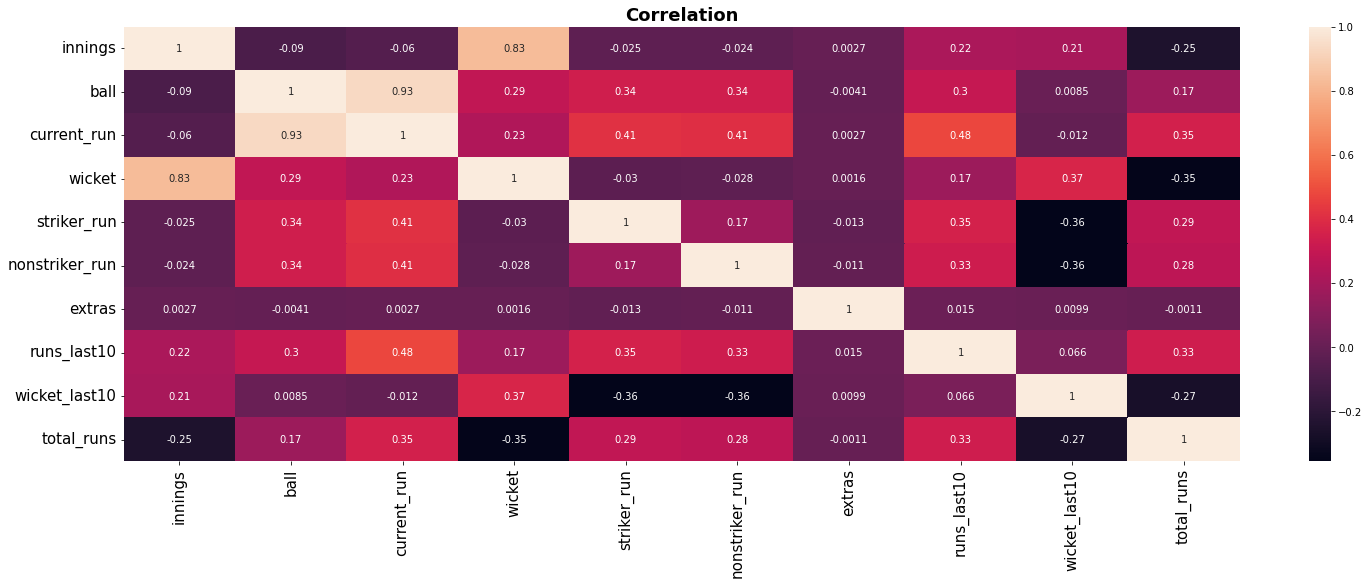

In [ ]:
cormin=df1[['season','venue','innings','ball','batting_team','bowling_team','current_run','wicket',
           'striker','non_striker','bowler','striker_run','nonstriker_run','wicket_type','player_dismissed',
            'extras','runs_last10','wicket_last10','total_runs']]
cor = cormin.corr()
plt.figure(figsize=(25,8))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True)
plt.title("Correlation",fontsize=18,fontweight="bold")
plt.xticks(size = 15,rotation=90)
plt.yticks(size = 15)

# Histogram

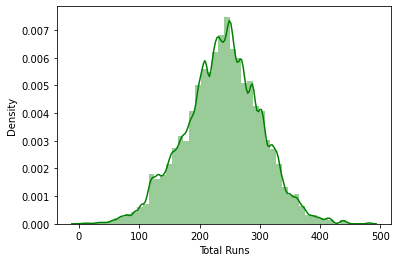

In [ ]:
sns.distplot(df1['total_runs'], color = 'green', axlabel = 'Total Runs')

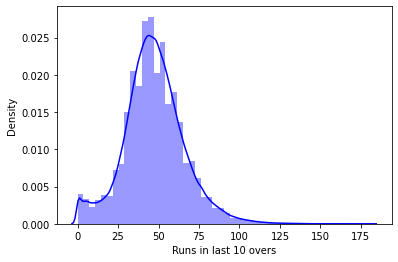

In [ ]:
sns.distplot(df1['runs_last10'],color = 'blue', axlabel='Runs in last 10 overs')

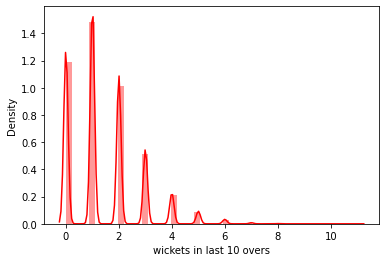

In [ ]:
sns.distplot(df1['wicket_last10'], color= 'red', axlabel ='wickets in last 10 overs')

# **Top 10 most played vennue**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

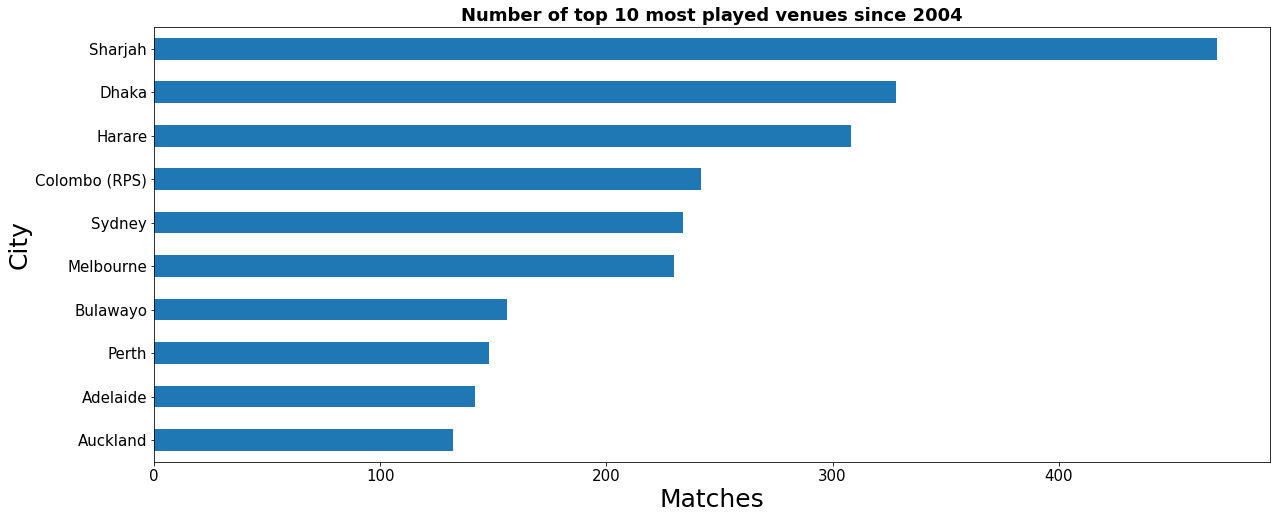

In [ ]:
plt.title("Number of top 10 most played venues since 2004",fontsize=18,fontweight="bold")
p1 = df3.Ground.value_counts().head(10).plot(kind='barh',figsize=[20,8])
p1.invert_yaxis()
plt.ylabel("City", size = 25)
plt.xlabel("Matches", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

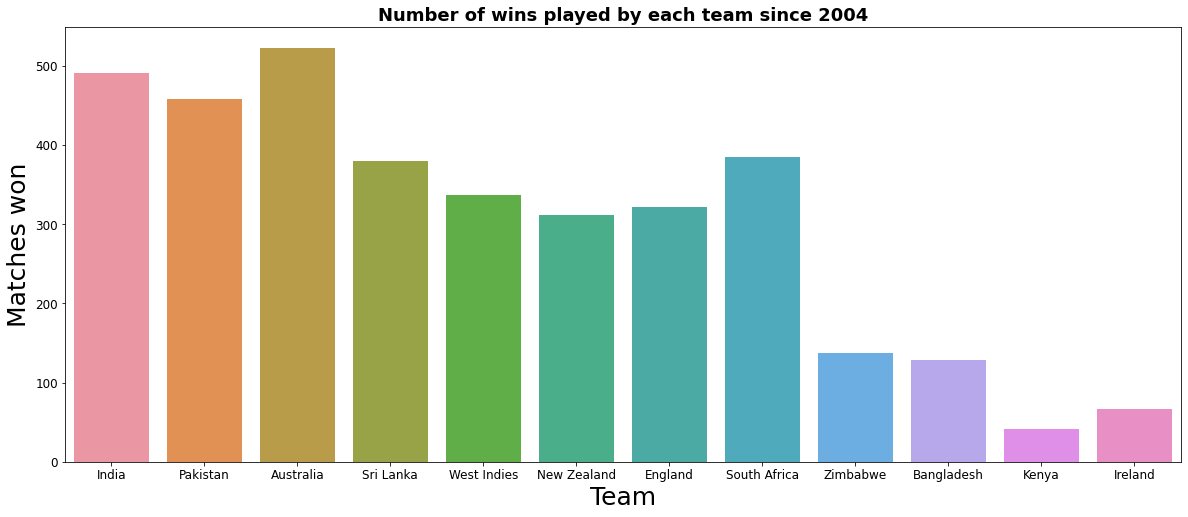

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot('team1', data = df3[df3.result=='won'], order=pd.value_counts(df3['team1']).iloc[:12].index)
plt.title("Number of wins played by each team since 2004",fontsize=18,fontweight="bold")
plt.ylabel("Matches won", size = 25)
plt.xlabel("Team", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)



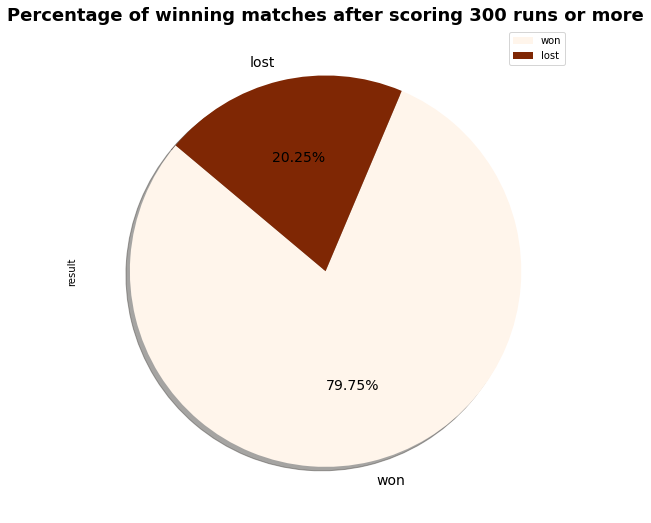

In [ ]:
plt.title("Percentage of winning matches after scoring 300 runs or more",fontsize=18,fontweight="bold")
df3[df3.runs >=300].result.value_counts().plot(kind='pie',autopct='%.2f%%', fontsize=14, 
                                               figsize=(9,9), shadow=True, startangle=140, legend=True, cmap='Oranges')

In [ ]:
#Pivot Table for total runs per season of a batsman
batsman_season=pd.pivot_table(df1,index=["season"],values=["runs_off_bat"],columns=['striker'],aggfunc='sum',fill_value=0)
#batsman_season['best_season_runs']=batsman_season.max(axis=1)

#batsman_season['best_season_batsman']=batsman_season.apply(lambda x:batsman_season.columns[x.argmax()],axis=1)
batsman_season= batsman_season.agg(['idxmax','max'], axis=1).mask(lambda x: x['max'].eq(0))
batsman_season['season'] = batsman_season.index

#best_season_batsman refers to the batsman who scored the highest total runs in all the matches in a seson.

In [ ]:
batsman_season['idxmax']=[('2003/04 AC Gilchrist'),
('2004 KC Sangakkara'),
('2004/05 KP Pietersen'),
('2005 AC Gilchrist'),
('2005/06 KC Sangakkara'),
('2006 RR Sarwan'),
('2006/07  ML Hayden'),
('2007  SR Tendulkar'),
('2007/08 Mohammad Yousuf'),
('2008 MS Dhoni'),
('2008/09 V Sehwag'),
('2009 MJ Clarke'),
('2009/10 RT Ponting'),
('2010 AJ Strauss'),
('2010/11 HM Amla'),
('2011 SR Watson'),
('2011/12 V Kohli'),
('2012 IR Bell'),
('2012/13 TM Dilshan'),
('2013 KC Sangakkara'),
('2013/14 V Kohli'),
('2014 F du Plessis'),
('2014/15 KC Sangakkara'),
('2015 KS Williamson'),
('2015/16 RG Sharma'),
('2016 LD Chandimal'),
('2016/17 DA Warner'),
('2017 V Kohli') ,
('2017/18 V Kohli') ,
('2018 Imam-ul-Haq'),
('2018/19 V Kohli'),
('2019 SD Hope'),
('2019/20 SD Hope'),
('2020 SW Billings'),
('2020/21 PR Stirling'),
('2021 JN Malan'),
('2021/22 K Verreynne')]

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text major ticklabel objects>)

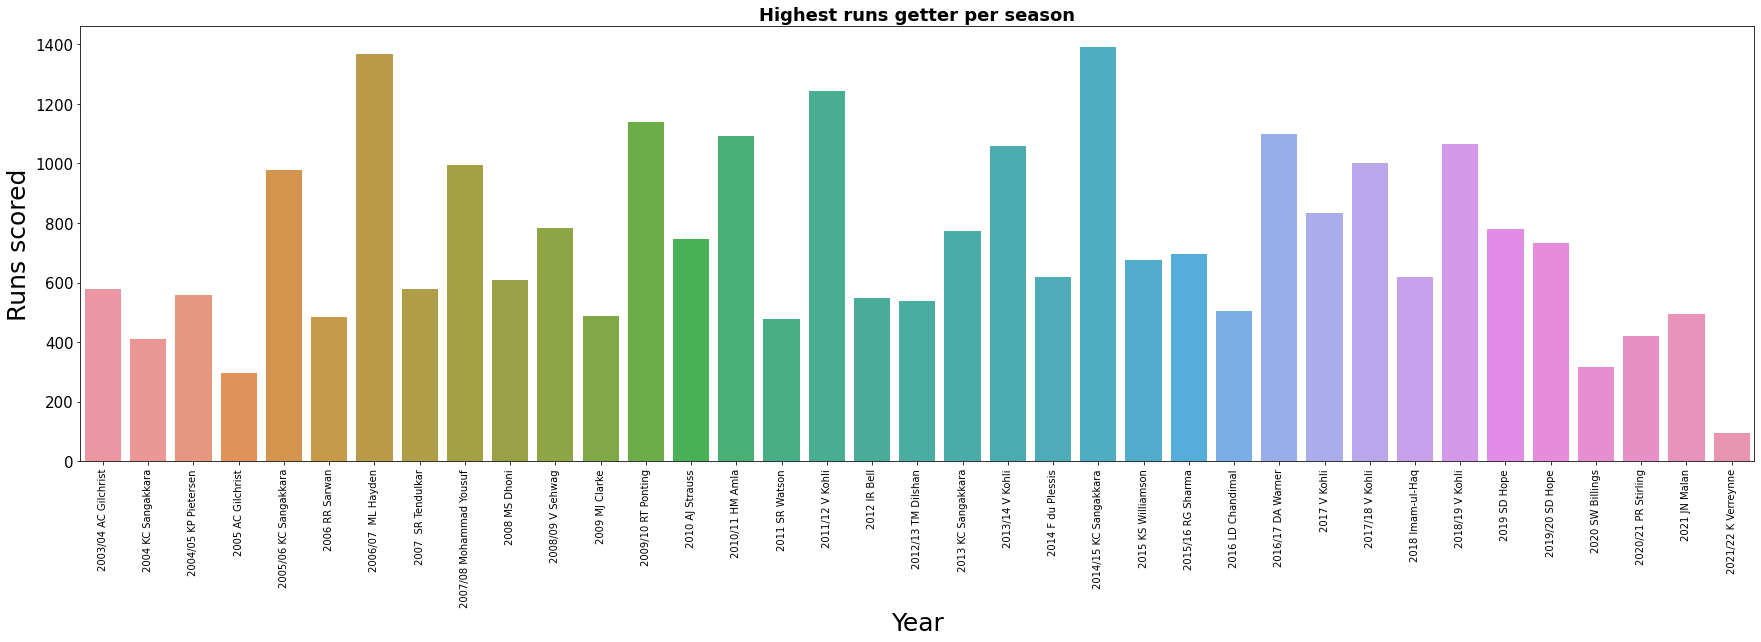

In [ ]:
plt.figure(figsize=(30,8))
sns.barplot(x=batsman_season['idxmax'], y=batsman_season['max'], hue=None, data=batsman_season)
plt.title("Highest runs getter per season",fontsize=18,fontweight="bold")
plt.ylabel("Runs scored", size = 25)
plt.xlabel("Year", size = 25)
plt.xticks(size = 10,rotation=90)
plt.yticks(size = 15)

# **Different types of dismissals**

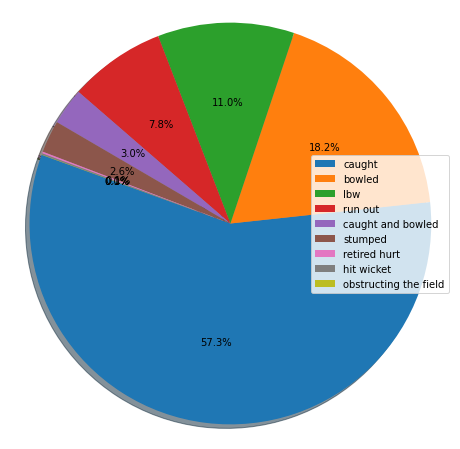

In [ ]:
dis=df1[df1.wicket_type.notna()].wicket_type.value_counts()
plt.figure(figsize=(8,8))
plt.pie(dis,autopct='%1.1f%%', startangle=160, shadow=True)
plt.axis('equal')
plt.legend( loc = 'right', labels=dis.index)
plt.show()

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text major ticklabel objects>)

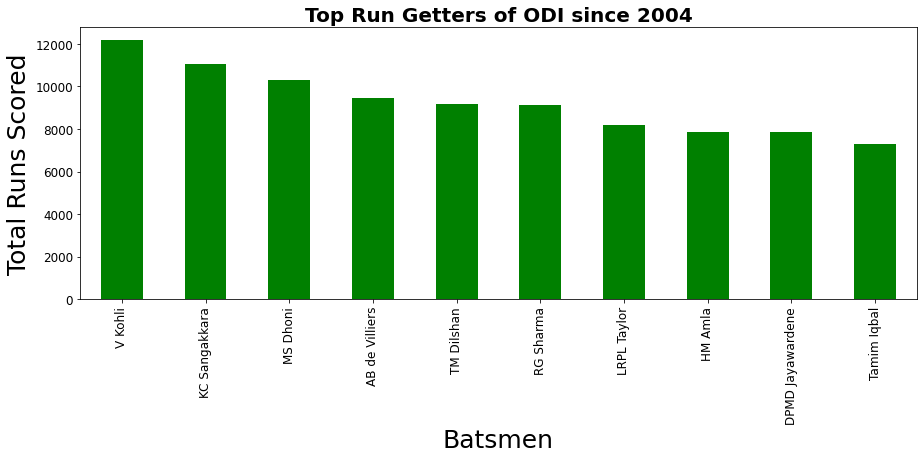

In [ ]:
#let's plot the top 10 run getter so far in ODI
df1.groupby('striker')['runs_off_bat'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'green',
                                                                                            figsize = (15,5))
plt.title("Top Run Getters of ODI since 2004", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text major ticklabel objects>)

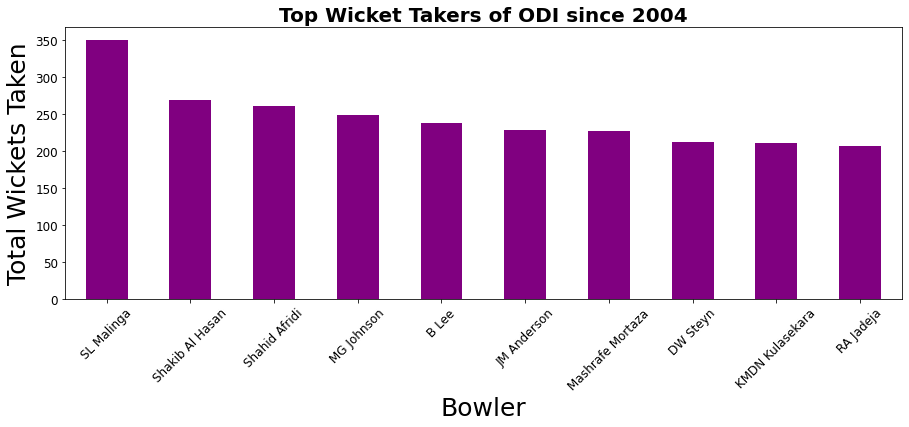

In [ ]:
df1.groupby('bowler')['wicket_type'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                color = 'purple', figsize = (15,5))
plt.title("Top Wicket Takers of ODI since 2004", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 25)
plt.ylabel("Total Wickets Taken", size = 25)
plt.xticks(size = 12,rotation=45)
plt.yticks(size = 12)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.]), <a list of 8 Text major ticklabel objects>)

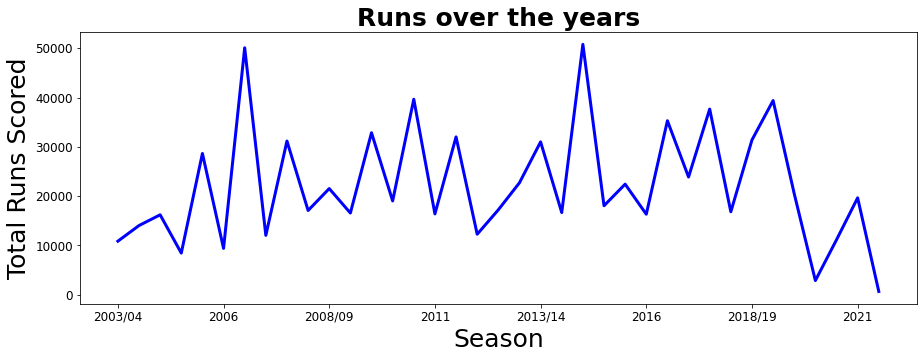

In [ ]:
df1.groupby('season')['runs_off_bat'].sum().plot(kind = 'line', linewidth = 3, figsize =(15,5),color = 'blue')
plt.title("Runs over the years",fontsize= 25, fontweight = 'bold')
plt.xlabel("Season", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

In [ ]:
#We will consider players who have played 10 or more seasons
no_of_balls = pd.DataFrame(df1.groupby('striker')['ball'].count()) #total number of matches played by each batsman
runs = pd.DataFrame(df1.groupby('striker')['runs_off_bat'].sum()) #total runs of each batsman
seasons = pd.DataFrame(df1.groupby('striker')['season'].nunique()) #season = 1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['runs_off_bat'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,12])][['season','striker','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate.head(10)

,season,striker,strike_rate
42,10,AD Russell,128.447205
528,10,Imad Wasim,107.524537
749,12,LE Plunkett,106.560636
1138,10,Rashid Khan,101.578947
94,12,AU Rashid,98.947368
576,10,JDS Neesham,96.037464
38,10,AD Hales,94.077901
442,12,GP Swann,90.476190
856,12,MR Marsh,89.316239
348,12,DR Smith,88.181818


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text major ticklabel objects>)

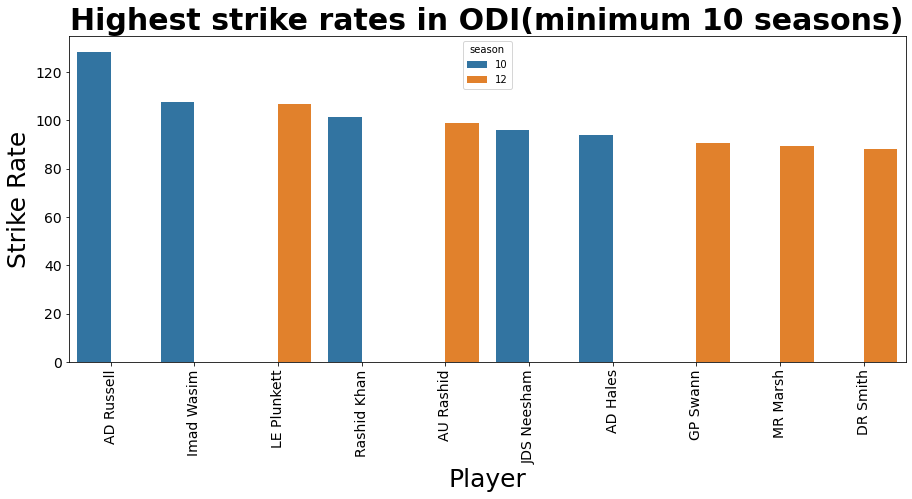

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x='striker', y='strike_rate', data = highest_strike_rate.head(10), hue = 'season')
plt.title("Highest strike rates in ODI(minimum 10 seasons)",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Strike Rate", size = 25)
plt.xticks(size = 14, rotation=90)
plt.yticks(size = 14)

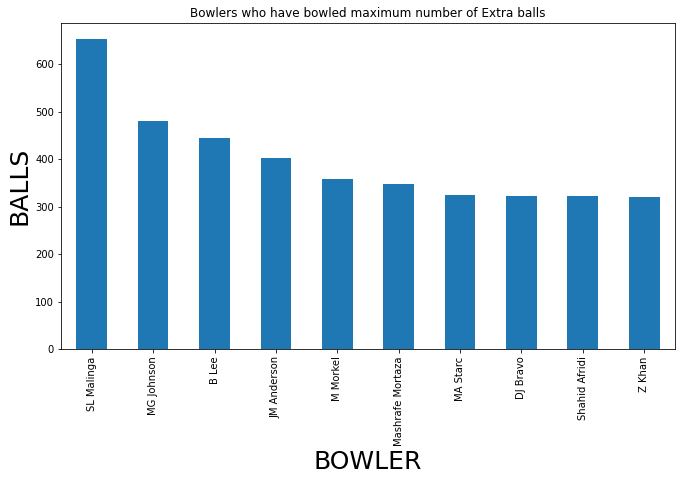

In [ ]:
extra = df1[df1['extras']!=0]['bowler'].value_counts()[:10]
extra.plot(kind='bar', figsize=(11,6), title='Bowlers who have bowled maximum number of Extra balls')

plt.xlabel('BOWLER',size = 25)
plt.ylabel('BALLS',size = 25)
plt.show()

(array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 7 Text major ticklabel objects>)

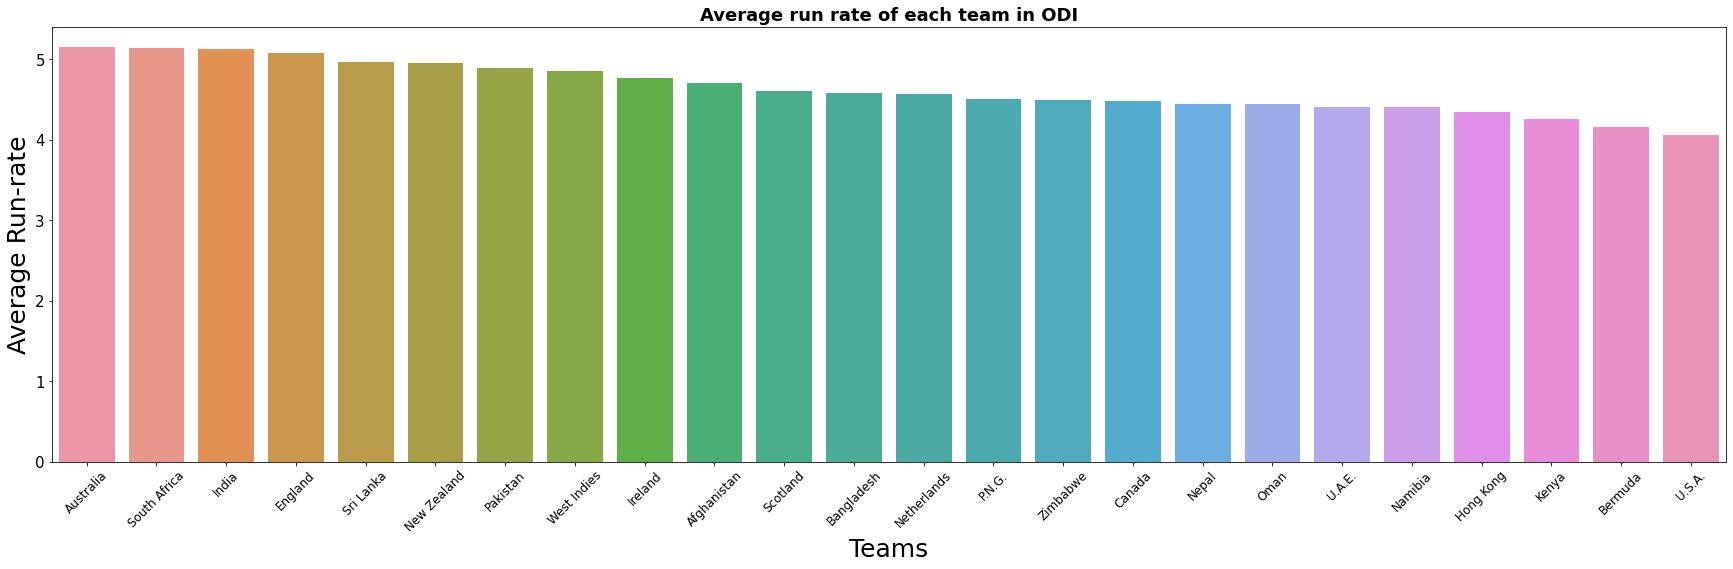

In [ ]:
rr = df3.groupby(['team1']).mean()
rr['team1']=rr.index
#df1 = df1[(df1['batting_team'].isin(top12_teams)) & (df1['bowling_team'].isin(top12_teams))]
top = ['Afghanistan', 'Australia', 'Bangladesh',
       'Bermuda', 'Canada', 'England', 'Hong Kong',
       'India', 'Ireland', 'Kenya', 'Namibia', 'Nepal', 'Netherlands',
       'New Zealand', 'Oman', 'P.N.G.', 'Pakistan', 'Scotland',
       'South Africa', 'Sri Lanka', 'U.A.E.', 'U.S.A.', 'West Indies',
       'Zimbabwe']
rr = rr[rr.team1 != 'Africa XI']
rr = rr[rr.team1 != 'Asia XI']
rr = rr[rr.team1 != 'ICC World XI']
rr=rr.sort_values(by=['rpo'],ascending=False)
plt.figure(figsize=(30,8))
sns.barplot(x=rr['team1'], y=rr['rpo'], hue=None, data=rr)
plt.title("Average run rate of each team in ODI",fontsize=18,fontweight="bold")
plt.ylabel("Average Run-rate", size = 25)
plt.xlabel("Teams", size = 25)
plt.xticks(size = 12,rotation=45)
plt.yticks(size = 15)

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

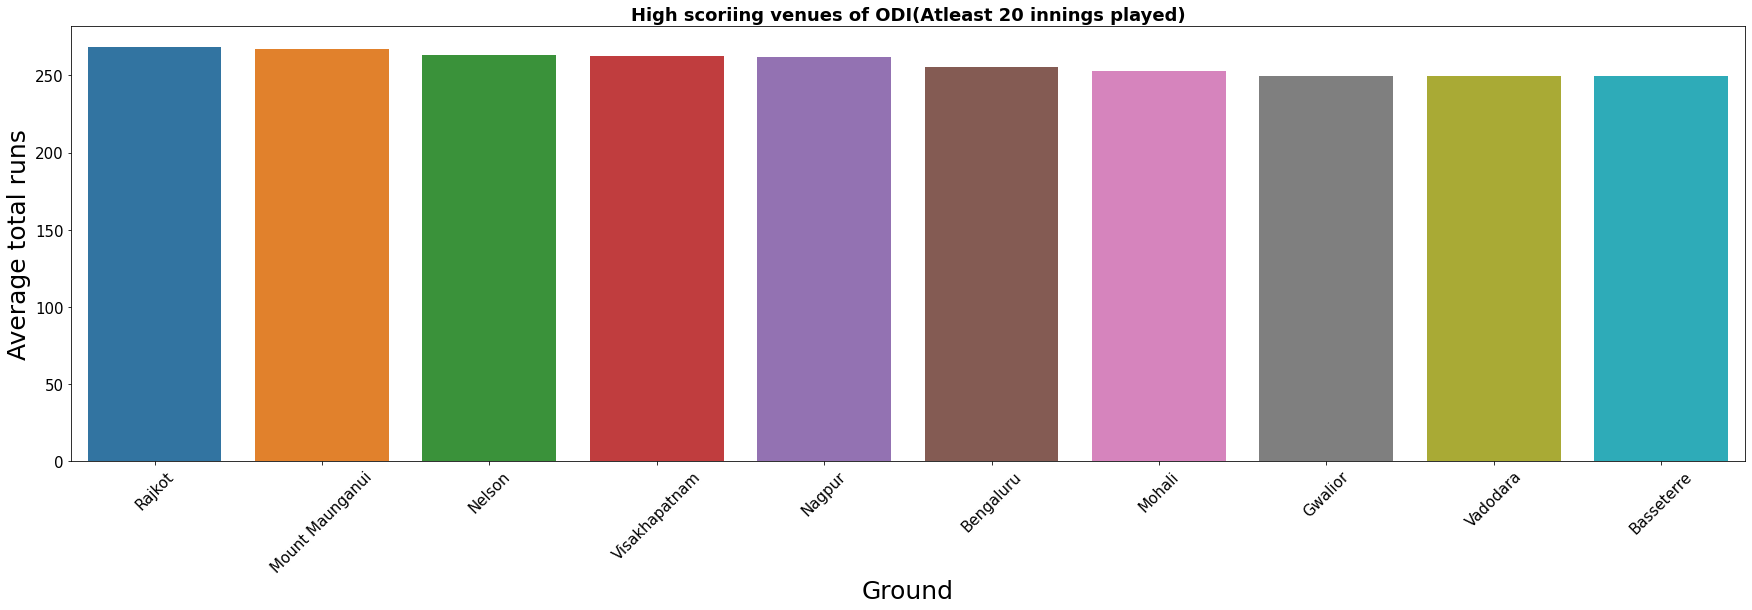

In [ ]:
min20 = df3['Ground'].value_counts()
battingheaven = df3[df3['Ground'].isin(min20.index[min20 >= 20])]
battingheaven = battingheaven.groupby(['Ground']).mean()
battingheaven=battingheaven.sort_values(by=['runs'],ascending=False)
battingheaven['Ground']=battingheaven.index
battingheaven = battingheaven.head(10)
plt.figure(figsize=(30,8))
sns.barplot(x=battingheaven['Ground'], y=battingheaven['runs'], hue=None, data = battingheaven)
plt.title("High scoriing venues of ODI(Atleast 20 innings played)",fontsize=18,fontweight="bold")
plt.ylabel("Average total runs", size = 25)
plt.xlabel("Ground", size = 25)
plt.xticks(size = 15,rotation=45)
plt.yticks(size = 15)

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 10 Text major ticklabel objects>)

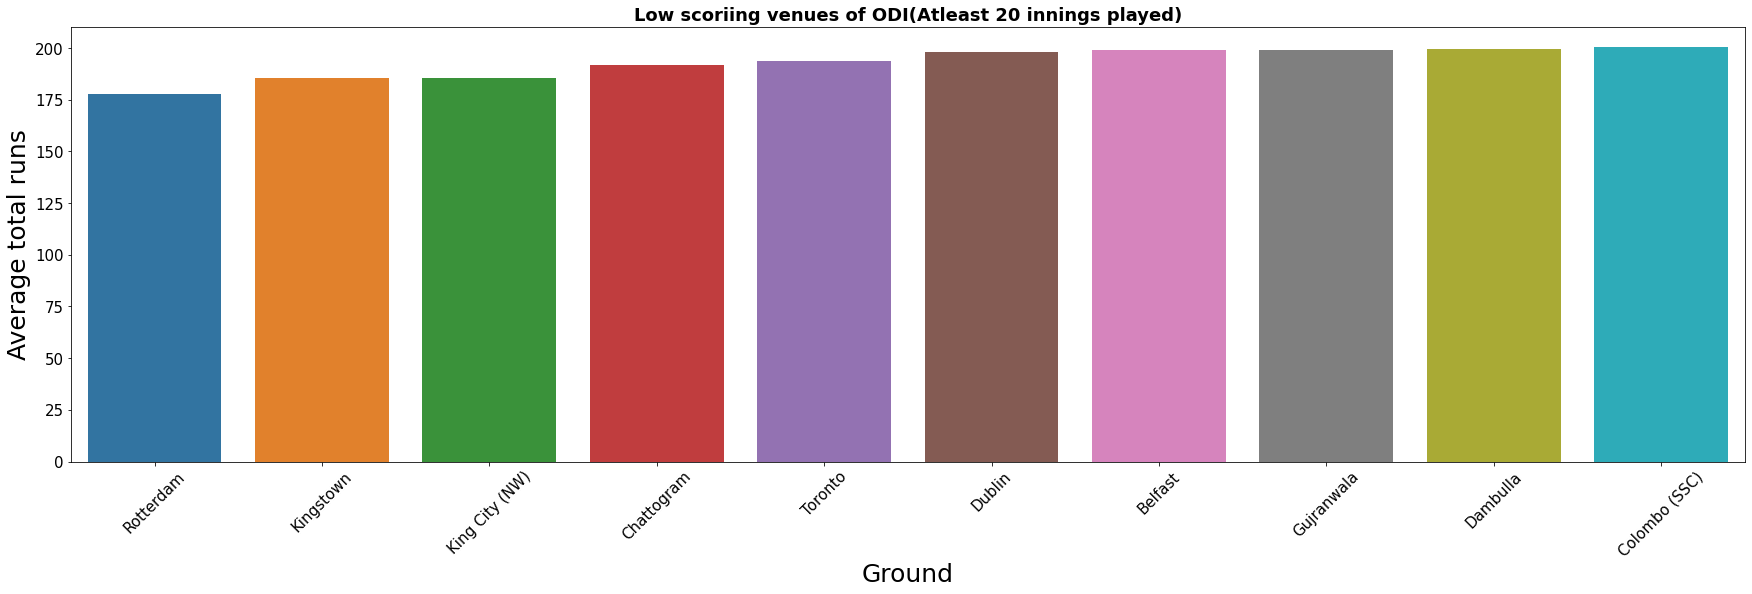

In [ ]:
min20 = df3['Ground'].value_counts()
battinghell = df3[df3['Ground'].isin(min20.index[min20 >= 20])]
battinghell = battinghell.groupby(['Ground']).mean()
battinghell=battinghell.sort_values(by=['runs'],ascending=True)
battinghell['Ground']=battinghell.index
battinghell = battinghell.head(10)
plt.figure(figsize=(30,8))
sns.barplot(x=battinghell['Ground'], y=battinghell['runs'], hue=None, data = battinghell)
plt.title("Low scoriing venues of ODI(Atleast 20 innings played)",fontsize=18,fontweight="bold")
plt.ylabel("Average total runs", size = 25)
plt.xlabel("Ground", size = 25)
plt.xticks(size = 15,rotation=45)
plt.yticks(size = 15)

# **Dependent and independent features**

In [33]:
x = df1.iloc[: , [5,7,9,12,13,17,18,27,28,29,30,31,32,34]].values #Input features:ball,batL,ballL,current_run,wicket,striker_run,nonstriker_run,
                                                                  #runs_last10,wicket_last10,venue_avg,bat_team_avg,bat_team_str_avg,bowl_team_avg,bowl_team_eco
y = df1.iloc[: , 35].values #Label:total_runs

In [34]:
print('x values are: ', x)
print('------------------------------')
print('y values are: ', y)

x values are:  [[ 0.1         8.          7.         ... 87.         34.
   5.1429717 ]
 [ 0.2         8.          7.         ... 87.         34.
   5.1429717 ]
 [ 0.3         8.          7.         ... 87.         34.
   5.1429717 ]
 ...
 [49.5        10.          6.         ... 93.         41.
   5.36633041]
 [49.6        10.          6.         ... 93.         41.
   5.36633041]
 [49.7        10.          6.         ... 93.         41.
   5.36633041]]
------------------------------
y values are:  [229 229 229 ... 277 277 277]


# **Split data into training and testing**

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state= 2)

In [36]:
print('Rows and columns for Trainng Independent data: ',x_train.shape) 
print('Rows and columns for Testing Independent data: ',x_test.shape)
print('Rows for Trainng Dependent data: ',y_train.shape) 
print('Rows for Testing Dependent data: ',y_test.shape) 

Rows and columns for Trainng Independent data:  (411731, 14)
Rows and columns for Testing Independent data:  (102933, 14)
Rows for Trainng Dependent data:  (411731,)
Rows for Testing Dependent data:  (102933,)


# **Feature scaling**

In [37]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) 

# **Multiple Linear Regression**

In [38]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
param_grid = {'normalize': [True, False]}
cv_lin = GridSearchCV(estimator=lin, param_grid=param_grid, cv= 5)
cv_lin.fit(x_train,y_train)
cv_lin.best_params_

{'normalize': True}

In [39]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression(normalize='deprecated')
lin.fit(x_train,y_train)
print("Linear Regression Train Accuracy: {:.2f} %".format(lin.score(x_train,y_train)*100))
print("Linear Regression Test Accuracy: {:.2f} %".format(lin.score(x_test,y_test)*100))
y_pred = lin.predict(x_test) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Linear Regression Train Accuracy: 55.95 %
Linear Regression Test Accuracy: 55.89 %
RMSE: 41.584407271837286


# **Lasso Regression**

In [42]:
from sklearn.linear_model import Lasso
lasso_regressor = Lasso()
param_grid = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40],
              'selection': ['random', 'cyclic'],
              'normalize': [True, False]
            }
cv_lasso_regressor = GridSearchCV(estimator=lasso_regressor, param_grid=param_grid, cv= 5)
cv_lasso_regressor.fit(x_train,y_train)
cv_lasso_regressor.best_params_

{'alpha': 0.001, 'normalize': False, 'selection': 'random'}

In [40]:
from sklearn.linear_model import Lasso
lasso_regressor = Lasso(alpha=0.001,normalize='deprecated',selection = 'random')
lasso_regressor.fit(x_train,y_train)
print("Lasso Regression Train Accuracy: {:.2f} %".format(lasso_regressor.score(x_train,y_train)*100))
print("Lasso Regression Test Accuracy: {:.2f} %".format(lasso_regressor.score(x_test,y_test)*100))
y_pred = lasso_regressor.predict(x_test) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Lasso Regression Train Accuracy: 55.95 %
Lasso Regression Test Accuracy: 55.89 %
RMSE: 41.58443098816411


# **Decision Tree Regression**

In [41]:
from sklearn.tree import DecisionTreeRegressor
des_tree = DecisionTreeRegressor()
param_grid = {'criterion' : ['mse','friedman_mse'],
              'splitter': ['best','random']
             }
cv_des_tree = GridSearchCV(estimator=des_tree, param_grid=param_grid, cv= 5)
cv_des_tree.fit(x_train,y_train)
cv_des_tree.best_params_

{'criterion': 'friedman_mse', 'splitter': 'best'}

In [42]:
from sklearn.tree import DecisionTreeRegressor
des_tree = DecisionTreeRegressor(criterion='friedman_mse', splitter='best')
des_tree.fit(x_train,y_train)
print("DecisionTree Regression Train Accuracy: {:.2f} %".format(des_tree.score(x_train,y_train)*100))
print("DecisionTree Regression Test Accuracy: {:.2f} %".format(des_tree.score(x_test,y_test)*100))
y_pred = des_tree.predict(x_test) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

DecisionTree Regression Train Accuracy: 99.84 %
DecisionTree Regression Test Accuracy: 94.88 %
RMSE: 14.162480745241252


# **Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
param_grid = {'n_estimators': [100,200],
              'criterion': ['mse','mae']
             }
cv_random_forest = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv= 5)
cv_random_forest.fit(x_train,y_train)
cv_random_forest.best_params_

In [51]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(x_train,y_train)
print("RandomForest Regression Train Accuracy: {:.2f} %".format(random_forest.score(x_train,y_train)*100))
print("RandomForest Regression Test Accuracy: {:.2f} %".format(random_forest.score(x_test,y_test)*100))
y_pred = random_forest.predict(x_test) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RandomForest Regression Train Accuracy: 99.55 %
RandomForest Regression Test Accuracy: 97.60 %
RMSE: 9.6988258233728


# **K Nearest Neighbors Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
param_grid = {'n_neighbors': [2,5,7]
             }
cv_knn_reg = GridSearchCV(estimator=knn_reg, param_grid=param_grid, cv= 5)
cv_knn_reg.fit(x_train,y_train)
cv_knn_reg.best_params_

In [44]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=2)
knn_reg.fit(x_train,y_train)
print("KNN Regression Train Accuracy: {:.2f} %".format(knn_reg.score(x_train,y_train)*100))
print("KNN Regression Test Accuracy: {:.2f} %".format(knn_reg.score(x_test,y_test)*100))
y_pred = knn_reg.predict(x_test) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

KNN Regression Train Accuracy: 99.17 %
KNN Regression Test Accuracy: 96.60 %
RMSE: 11.550040045102651


# **Support Vector Regressor**

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
print("Support Vector Regression Train Accuracy: {:.2f} %".format(svr.score(x_train,y_train)*100))
print("Support Vector Regression Test Accuracy: {:.2f} %".format(svr.score(x_test,y_test)*100))
y_pred = svr.predict(x_test) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# **LightGBM Regressor**

In [45]:
from lightgbm import LGBMRegressor
LGBMR = LGBMRegressor()
LGBMR.fit(x_train,y_train)
print("LightGBM Regression Train Accuracy: {:.2f} %".format(LGBMR.score(x_train,y_train)*100))
print("LightGBM Regression Test Accuracy: {:.2f} %".format(LGBMR.score(x_test,y_test)*100))
y_pred = LGBMR.predict(x_test) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

LightGBM Regression Train Accuracy: 68.41 %
LightGBM Regression Test Accuracy: 67.99 %
RMSE: 35.42090666545001


#**GradientBoostingRegressor**

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print("GradientBoosting Regression Train Accuracy: {:.2f} %".format(GBR.score(x_train,y_train)*100))
print("GradientBoosting Regression Test Accuracy: {:.2f} %".format(GBR.score(x_test,y_test)*100))
y_pred = GBR.predict(x_test) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

GradientBoosting Regression Train Accuracy: 59.22 %
GradientBoosting Regression Test Accuracy: 59.07 %
RMSE: 40.05692036124952


# **XGBRegressor**

In [47]:
from xgboost import XGBRegressor
XGBR = XGBRegressor()
XGBR.fit(x_train,y_train)
print("XGBoost Regression Train Accuracy: {:.2f} %".format(XGBR.score(x_train,y_train)*100))
print("XGBoost Regression Test Accuracy: {:.2f} %".format(XGBR.score(x_test,y_test)*100))
y_pred = XGBR.predict(x_test) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[14:35:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Regression Train Accuracy: 59.07 %
XGBoost Regression Test Accuracy: 58.92 %
RMSE: 40.12896214082316


# **Cross Validation of best performing algorithms**

In [48]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=2)

In [49]:
cross_val_score(knn_reg, x, y, cv=cv)

array([0.95216588, 0.95508934, 0.95508829, 0.95500984, 0.95436965])

In [50]:
cross_val_score(des_tree, x, y, cv=cv)

array([0.94808603, 0.94728503, 0.94765516, 0.94594019, 0.94760148])

# **Predict total score**

In [52]:
y_pred_random = knn_reg.predict(x_test) 
y_pred_random

array([221. , 231. , 224. , ..., 136. , 163. , 313.5])

In [72]:
print('Actual values are ',y_test)
print('-----------------------------')
print('Predicted values are ',y_pred)

Actual values are  [221 231 224 ... 136 163 327]
-----------------------------
Predicted values are  [219.64 231.   224.   ... 136.   163.08 317.87]


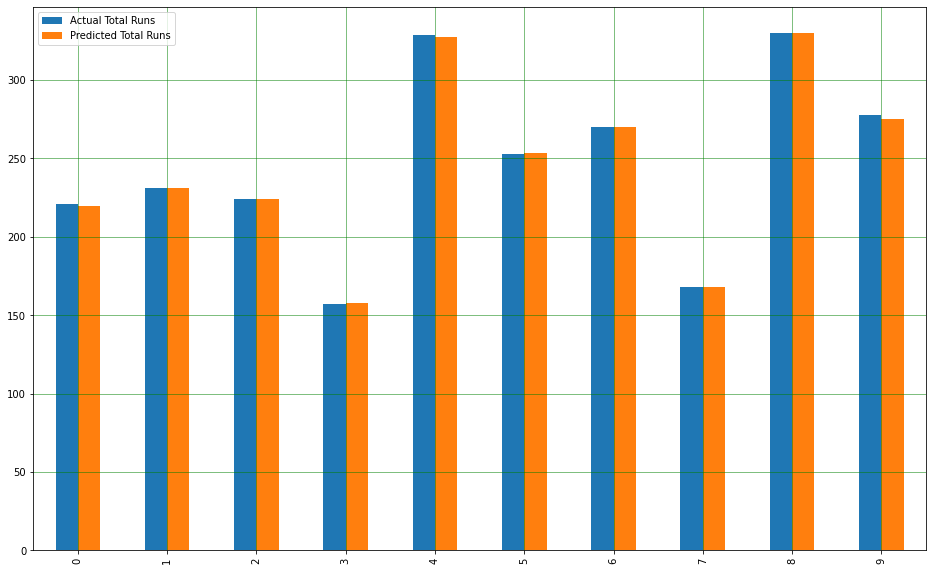

In [54]:
df4 = pd.DataFrame({'Actual Total Runs': y_test, 'Predicted Total Runs': y_pred})
df4 = df4.head(10)
df4.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [68]:
#Input features:ball,batL,ballL,current_run,wicket,striker_run,nonstriker_run,
#runs_last10,wicket_last10,venue_avg,bat_team_avg,bat_team_str_avg,bowl_team_avg,bowl_team_eco
run_prediction = knn_reg.predict(sc.transform(np.array([[21.2,2,1,100,3,21,7,40,2,190,228,80,35,5.21]])))
print("Predicted runs after 50 overs:" , run_prediction)

Predicted runs after 50 overs: [250.]


In [71]:
run_prediction1 = random_forest.predict(sc.transform(np.array([[21.2,2,1,100,3,21,7,40,2,190,228,80,35,5.21]])))
print("Predicted runs after 50 overs:" , run_prediction1)

Predicted runs after 50 overs: [199.44]
